In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import rfpimp
import pickle

In [3]:
df = pd.read_csv("../data/clean/clean_encoded.csv")

In [4]:
df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
X = df.drop("y", axis=1)
y = df.y

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
k_range = range(10, 200, 10)
k_scores = []
for k in k_range:
    rfc = RandomForestClassifier(n_estimators=k)
    score = cross_val_score(rfc, X, y, cv=10, scoring="accuracy")
    k_scores.append(score.mean())
print(k_scores)

[0.4950186524488956, 0.49837259551041224, 0.47928232162146955, 0.4798179830534807, 0.48083710524940537, 0.4800594686526436, 0.4685238936908916, 0.47401374652983524, 0.4690832489176767, 0.472847542315867, 0.4661936676637682, 0.4684520219235728, 0.47452344329055085, 0.4720948971576058, 0.4677479971163997, 0.466145230162478, 0.46959407816746285, 0.4659742891950044, 0.4692050858668549]


Text(0, 0.5, 'Cross-Validated Accuracy')

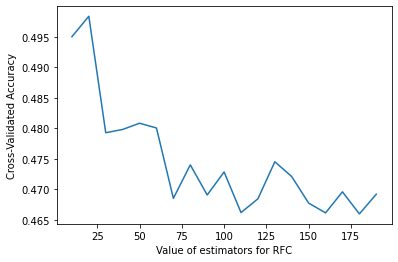

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of estimators for RFC")
plt.ylabel("Cross-Validated Accuracy")

In [6]:
rfc = RandomForestClassifier()
score = cross_validate(rfc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
score["test_accuracy"].mean()

0.3994198585563167

In [16]:
score["test_roc_auc"].mean()

0.089524059611181

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.8886595434677028

In [25]:
roc_auc_score(y_test, y_pred)

0.6255044607449483

In [9]:
pickle.dump(rfc, open('../models/RandomForestClassifier.model', 'wb'))

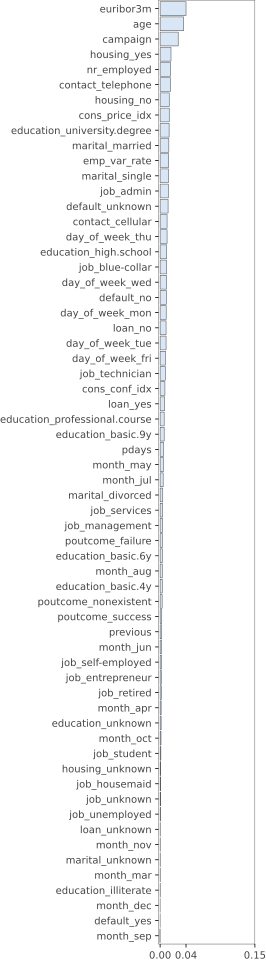

In [23]:
importance = rfpimp.importances(rfc, X_train, y_train)
rfpimp.plot_importances(importance)

In [11]:
loaded_rfc = pickle.load(open('../models/RandomForestClassifier.model', 'rb'))

In [ ]:
sample = ["..."]

In [ ]:
loaded_rfc.predict([sample])